# Tarea 3 (tema 5): Intervalos de confianza
## 
1) Intervalos de confianza para la media y la desviación poblacional a partir de una muestra.

## 1.a) 
Utilizando como semilla (seed) el número 12345 generar un vector que contenga una secuencia de 30
números que sigan una distribución normal con media 6 y desviación típica 1. Determinar su media y su
desviación típica.

In [ ]:
set.seed(12345)
y <- rnorm(30, mean=6, sd=1) 
cat("Vector de 30 números con distribución N(6,1):","\n",y,"\n","\n")
mu=mean(y)
sigma=sd(y)
cat("La media del vector y es",mu,"y su desviación típica es",sigma,"\n")

Vector de 30 números con distribución N(6,1): 
 6.585529 6.709466 5.890697 5.546503 6.605887 4.182044 6.630099 5.723816 5.71584 5.080678 5.883752 7.817312 6.370628 6.520216 5.249468 6.8169 5.113642 5.668422 7.120713 6.298724 6.779622 7.455785 5.355672 4.446863 4.40229 7.805098 5.518353 6.62038 6.612123 5.837689 
 
La media del vector y es 6.078807 y su desviación típica es 0.9382258 


## 1.b)
Representar el histograma del vector anterior, superponiendo en otro color la curva con la distribución
teórica (normal) asumida.

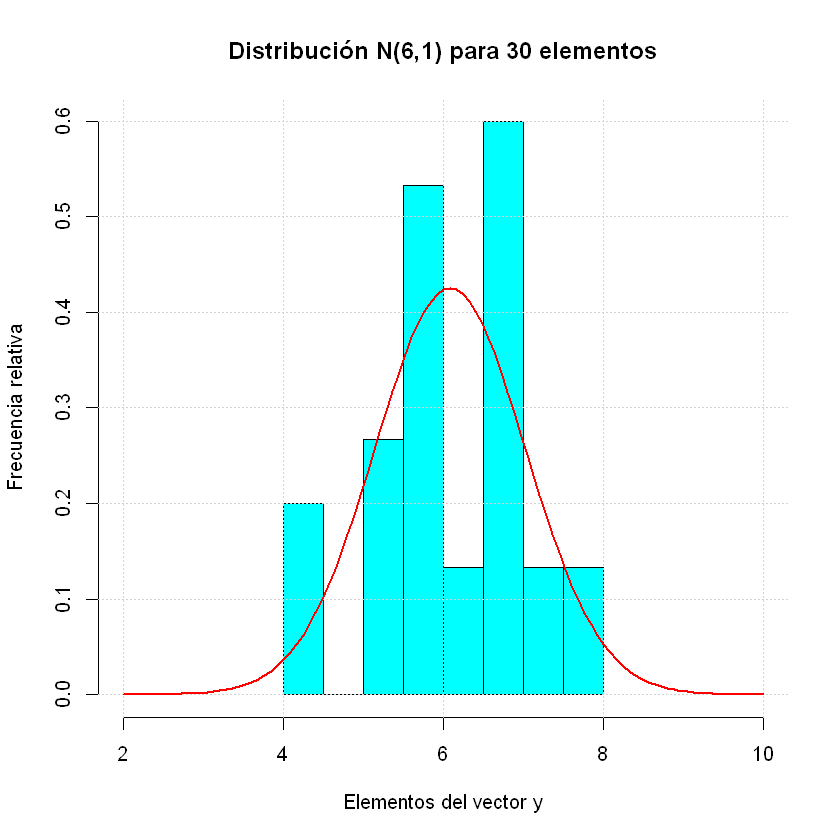

Plot with title "Distribución N(6,1) para 30 elementos"

In [ ]:
hist(y,freq=FALSE,xlim=c(2,10),col='cyan',main="Distribución N(6,1) para 30 elementos",ylab="Frecuencia relativa",xlab="Elementos del vector y")
grid()
curve(dnorm(x,mu,sigma),add=TRUE,col='red',lwd=2)

## 1.c)
Obtener un intervalo de confianza del 90% para la media poblacional sin hacer la suposición de que la
aproximación normal es razonable y haciendo la suposión de que la aproximación normal es razonable.
Compara los dos resultados.

Sin aproximación normal:

In [ ]:
intconf <- function(x, nc){
tlim <- (1 - nc/100)/2                            #alfa/2
t  <- qt(tlim, df=length(x)-1, lower.tail=FALSE)  #usa distribución t (no se considera aprox normal)
l1 <- mean(x) - t*sd(x)/sqrt(length(x))           #límite inferior
l2 <- mean(x) + t*sd(x)/sqrt(length(x))           #límite superior
cat("Intervalo del ", nc, "%: [", l1, ",", l2, "]", "\n")
return(c(l1,l2))                                  #devuelve como resultado los dos límites
}

In [ ]:
#Nivel de confianza 90%
limites <- intconf(y,90)

Intervalo del  90 %: [ 5.787754 , 6.36986 ] 


Con aproximación normal:

In [ ]:
intconf2 <- function(x, nc){
zlim <- (1 - nc/100)/2                            #alfa/2
z  <- qnorm(zlim, lower.tail=FALSE)               #usa distribución z_alfa/2
l1 <- mean(x) - z*sd(x)/sqrt(length(x))           #límite inferior
l2 <- mean(x) + z*sd(x)/sqrt(length(x))           #límite superior
cat("Intervalo del ", nc, "%: [", l1, ",", l2, "]", "\n")
return(c(l1,l2))                                  #devuelve como resultado los dos límites
}

In [ ]:
#Nivel de confianza 90%
limites2 <- intconf2(y,90)


Intervalo del  90 %: [ 5.79705 , 6.360564 ] 


In [ ]:
cat("Se aprecia que, siendo la media de la muestra ym=6.078807, los tamaños de los semiintervalos serían: ","\n")
cat("Sin aproximación normal: SI-=", mu-5.787754 , "; SI+=", 6.36986-mu,"\n")
cat("Sin aproximación normal: SI-=", mu-5.79705 , "; SI+=", 6.360564-mu,"\n","\n")
cat("Se ve que en ambos casos, como es de esperar, son intervalos simétricos y que en el caso en que no se considera 
aproximación normal, el intervalo es de mayor tamaño. Esto tampoco sorprende, ya que al reducirse los grados de libertad,
se ensancha la distribución.","\n")

Se aprecia que, siendo la media de la muestra ym=6.078807, los tamaños de los semiintervalos serían:  
Sin aproximación normal: SI-= 0.291053 ; SI+= 0.291053 
Sin aproximación normal: SI-= 0.281757 ; SI+= 0.281757 
 
Se ve que en ambos casos, como es de esperar, son intervalos simétricos y que en el caso en que no se considera 
aproximación normal, el intervalo es de mayor tamaño. Esto tampoco sorprende, ya que al reducirse los grados de libertad,
se ensancha la distribución. 


## 1.d)
Obtener un intervalo de confianza del 98% para la desviación típica poblacional.

In [ ]:
intconfsd <- function(x, nc){
lim <- (1-nc/100)/2                              #alfa/2
chi1 <- qchisq(lim, df=length(x)-1, lower.tail=FALSE)
chi2 <- qchisq(lim, df=length(x)-1)
l1 <- sqrt((length(x)-1)*var(x)/chi1)
l2 <- sqrt((length(x)-1)*var(x)/chi2)
cat("Intervalo del",nc,"%: [",l1,",",l2,"]","\n")
}

In [ ]:
intconfsd(y,98)

Intervalo del 98 %: [ 0.7174945 , 1.338137 ] 


# Ejercicio 2
## Intervalos de confianza para una proporción
Según el estudio de Polack et al 2020 (https://www.nejm.org/doi/full/10.1056/NEJMoa2034577
(https://www.nejm.org/doi/full/10.1056/NEJMoa2034577)) sobre la vacuna Pfizer contra el covid-19 se tomaron
2 muestras de entre las 43448 personas que participaron voluntariamente en el ensayo clínico para la vacuna.
A la primera muestra de 21720 personas se le administró la vacuna y a la segunda muestra de 21728
personas se le administró un placebo. El número de personas presentando cuadros relacionados con covid-19
y dando positivo en el test en el periodo estudiado para los vacunados y no vacunados fue 8 y 162
respectivamente.

## 2.a) 
Calcular el intervalo de confianza al 99% de las diferencias en proporción de casos covid-19 entre la
población vacunada y sin vacunar. Interpretar el resultado.

In [ ]:
#Muestras con distribución binomial:
#Hay una probabilidad de 8/21720 de dar positivo estando vacunado.      Estadístico P1
#Hay una probabilidad de 162/21728 de dar positivo no estando vacunado. Estadístico P2
#Media mu=p y sig2(sigma^2)=pq
#Para el estadistico P: mup=p y sig2p=pq/n=p(1-p)/n (muestra muy grande)

#Para la diferencia de medidas:
#mu(p1-p2)=p1-p2  sig2(p1-p2)=p1*q1/n1 + p2*q2/n2
fav1=162
tot1=21728
fav2=8
tot2=21720

p1=fav1/tot1                                 #Estadístico P1
p2=fav2/tot2                                 #Estadístico P2
med1=p1
sigma1=p1*(1-p1)                        #Distribución binomial de la muestra 1
med2=p2
sigma2=p2*(1-p2)


# Como n1 es similar a n2 y n1+n2 mucho mayor que 30 -> Aproximación normal de la distribución para la diferencia de medias:
intconfdifprop <- function(mu1, sig1, mu2, sig2, nc){
    zlim <- (1-nc/100)/2                         #alfa/2
    z <- qnorm(zlim, lower.tail=FALSE)           #99% de nivel confianza
    l1 <- mu1-mu2 - z*sqrt((sig1^2/tot1)+(sig2^2/tot2))
    l2 <- mu1-mu2 + z*sqrt((sig1^2/tot1)+(sig2^2/tot2))
    cat("Intervalo del",nc,"%: [",l1,",",l2,"]","\n")
}

#Corremos la función con los valores medios de p1 y p2 y sus varianzas:
intconfdifprop(med1,sigma1,med2,sigma2,99)

cat("Las probabilidades de dar positivo en ambos grupos son:","\n")
cat("p1=",p1,"para el grupo no vacunado.","\n")
cat("p2=",p2,"para el grupo vacunado.","\n")

cat("Este resultado indica, por un lado, que al encontrarse la probabilidad de dar positivo, siendo del grupo no vacunado, tan
cerca del valor central del intervalo, es mucho más probable que un positivo pertenezca a este grupo, ya que está 
en el centro de la normal y el otro valor central se encuentra en un extremo. La conclusión que se puede sacar es que la 
vacunación reduce mucho la probabilidad de dar positivo en el test.","\n")

Intervalo del 99 %: [ 0.006958017 , 0.007216969 ] 
Las probabilidades de dar positivo en ambos grupos son: 
p1= 0.007455817 para el grupo no vacunado. 
p2= 0.0003683241 para el grupo vacunado. 
Este resultado indica, por un lado, que al encontrarse la probabilidad de dar positivo, siendo del grupo no vacunado, tan
cerca del valor central del intervalo, es mucho más probable que un positivo pertenezca a este grupo, ya que está 
en el centro de la normal y el otro valor central se encuentra en un extremo. La conclusión que se puede sacar es que la 
vacunación reduce mucho la probabilidad de dar positivo en el test. 


## 2.b) 
Utilizando como semilla (seed) el número 12345 , generar dos muestras, con 10.000 elementos cada
una, que simulen el número de personas con positivo en covid-19 para las dos distribuciones binomiales con
parámetros n y p iguales a los de del estudio de Polack. Representa los histogramas de la proporción de casos
covid-19 para las dos muestras y compáralos.

Así creo que era como se debía hacer:






Se observa que en el caso con probabilidad p1=162/21728= 0.007455817 la distribución es como una normal centrada en 74.55817 .
Esto corresponde a la muestra de personas no vacunadas. 
Para la muestra de personas vacunadas, con probabilidad p2=8/21720= 0.0003683241 , la distribución no es simétrica, 
y las cantidades de positivos más probables se sitúan en valores mucho más bajos, está centrada en 3.683241 . 




Warning message in plot.window(xlim, ylim, "", ...):
""names.arg" is not a graphical parameter"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""names.arg" is not a graphical parameter"
Warning message in axis(1, ...):
""names.arg" is not a graphical parameter"
Warning message in axis(2, ...):
""names.arg" is not a graphical parameter"


Warning message in plot.window(xlim, ylim, "", ...):
""names.arg" is not a graphical parameter"
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""names.arg" is not a graphical parameter"
Warning message in axis(1, ...):
""names.arg" is not a graphical parameter"
Warning message in axis(2, ...):
""names.arg" is not a graphical parameter"





xsampler1
 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 
  2   1   3   9   9  10  20  14  34  40  52  60  85 120 137 159 206 252 227 294 
 67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86 
351 364 390 392 411 429 497 457 468 480 451 397 409 373 331 294 249 273 189 190 
 87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 
155 137 111  96  80  75  56  32  40  15  14  18  14  10   3   4   4   1   1   2 
108 110 
  2   1 

xsampler2
   0    1    2    3    4    5    6    7    8    9   10   11   12   13 
 251  947 1722 2145 1890 1391  849  471  204   73   42    9    4    2 

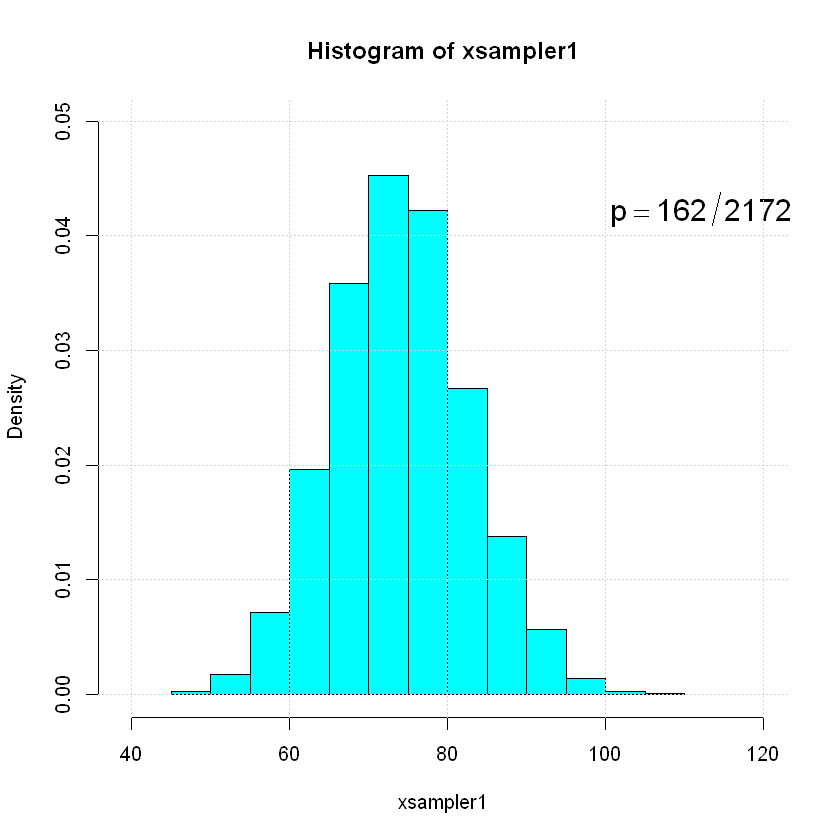

Plot with title "Histogram of xsampler1"

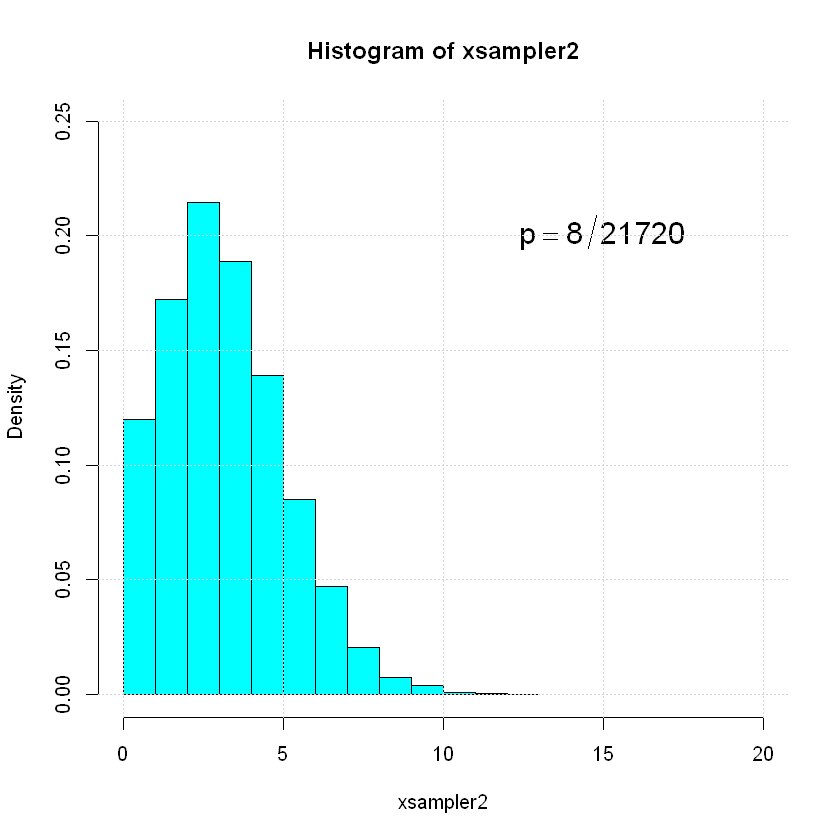

Plot with title "Histogram of xsampler2"

In [ ]:
#Así es como había que hacerlo (o más o menos así)
set.seed(12345)
xsampler1 <- rbinom(10000,10000,p1)
table(xsampler1)
hist(xsampler1,freq=FALSE,xlim=c(39,120), ylim=c(0,0.05), xpd=FALSE, names.arg=seq(0,10000,1),col="cyan") #Los límites fueron comprobados previamente.
text(x=99, y=0.042, expression(p == 162/21728), cex=1.5, pos=4)
grid()

xsampler2 <- rbinom(10000,10000,p2)
table(xsampler2)
hist(xsampler2,freq=FALSE,xlim=c(0,20), ylim=c(0,0.25), xpd=FALSE, names.arg=seq(0,10000,1),col="cyan") #Los límites fueron comprobados previamente.
text(x=12, y=0.2, expression(p == 8/21720), cex=1.5, pos=4)
grid()

cat("Se observa que en el caso con probabilidad p1=162/21728=", p1,"la distribución es como una normal centrada en" ,10000*p1,".
Esto corresponde a la muestra de personas no vacunadas.","\n")
cat("Para la muestra de personas vacunadas, con probabilidad p2=8/21720=", p2,", la distribución no es simétrica, 
y las cantidades de positivos más probables se sitúan en valores mucho más bajos, está centrada en", 10000*p2, ".","\n")

Así es como lo hice:


Se observa que en el caso con probabilidad p1=162/21728= 0.007455817 la distribución es como una normal centrada en 74.55817 .
Esto corresponde a la muestra de personas no vacunadas. 
Para la muestra de personas vacunadas, con probabilidad p2=8/21720= 0.0003683241 , la distribución no es simétrica, 
y las cantidades de positivos más probables se sitúan en valores mucho más bajos, está centrada en 3.683241 . 



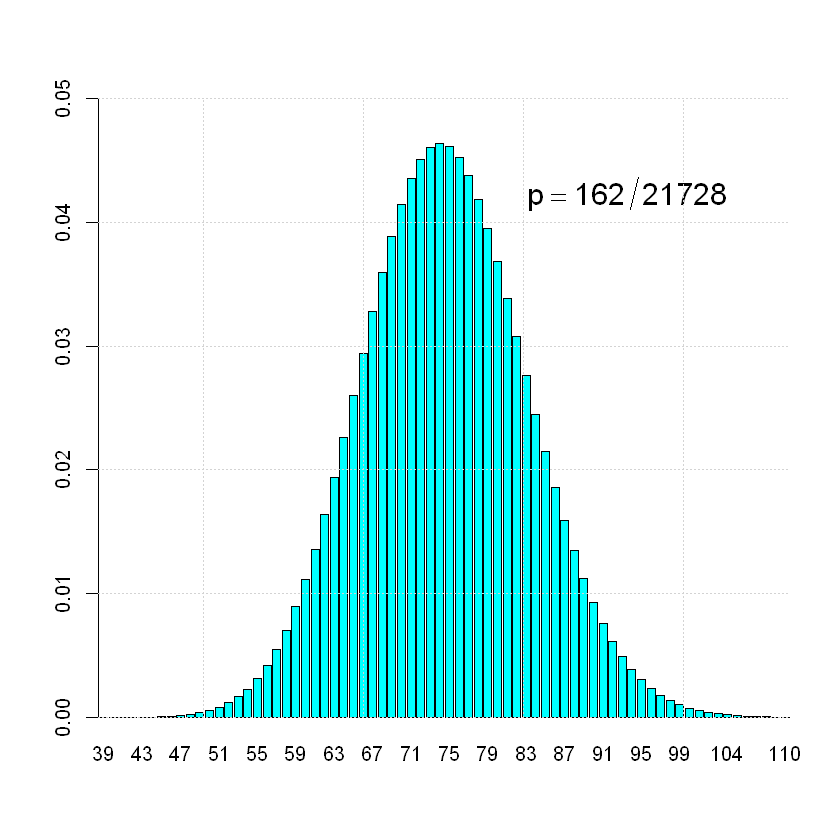

plot without title

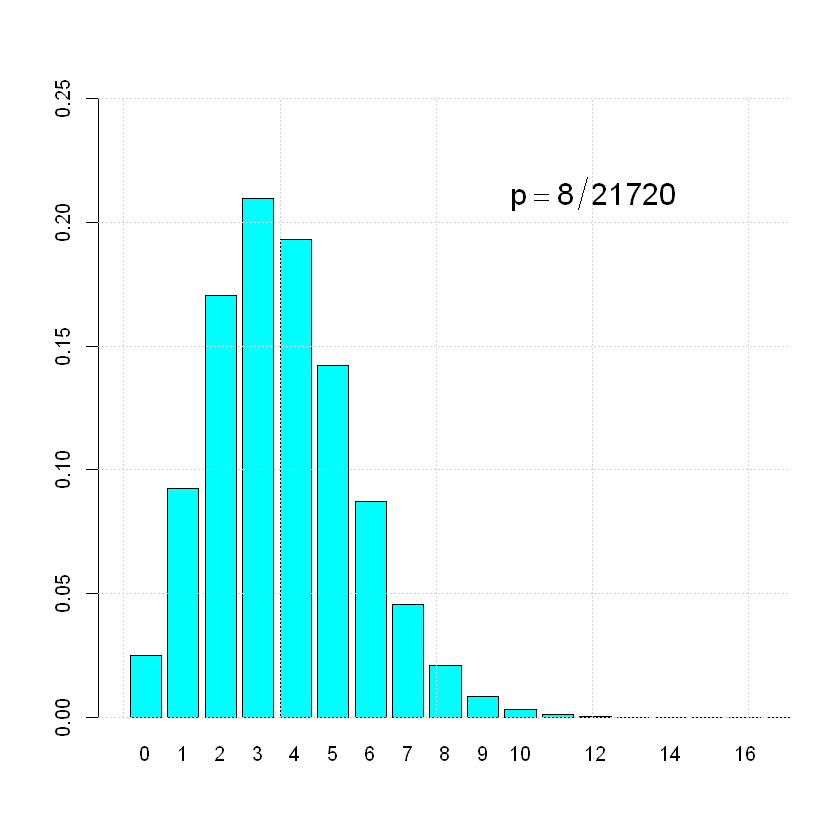

plot without title

In [ ]:
#Así es como lo había hecho
set.seed(12345)
xsample1 <- dbinom(0:10000,10000,p1)  #Muestra que las probabilidades de que haya desde 0 a 10k contagios.
barplot(xsample1, xlim=c(50,130), ylim=c(0,0.05), xpd=FALSE, names.arg=seq(0,10000,1),col="cyan") #Los límites fueron comprobados previamente.
text(x=99, y=0.042, expression(p == 162/21728), cex=1.5, pos=4)
grid()
xsample2 <- dbinom(0:10000,10000,p2)
barplot(xsample2, xlim=c(0,20.5), ylim=c(0,0.25), xpd=FALSE, names.arg=seq(0,10000,1),col="cyan")
text(x=12, y=0.21, expression(p == 8/21720), cex=1.5, pos=4)
grid()

cat("Se observa que en el caso con probabilidad p1=162/21728=", p1,"la distribución es como una normal centrada en" ,10000*p1,".
Esto corresponde a la muestra de personas no vacunadas.","\n")
cat("Para la muestra de personas vacunadas, con probabilidad p2=8/21720=", p2,", la distribución no es simétrica, 
y las cantidades de positivos más probables se sitúan en valores mucho más bajos, está centrada en", 10000*p2, ".","\n")